In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from mst_clustering import MSTClustering
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
import antropy as ant

In [7]:
raw_data1 = pd.read_csv("drying_actuator1.csv")
raw_data2 = pd.read_csv("drying_actuator2.csv")
raw_data = pd.concat([raw_data1, raw_data2], axis = 0)
raw_data['index'] = raw_data.groupby(['Date']).cumcount() + 1
raw_data = raw_data.reset_index(drop = True)

In [8]:
raw_data.Date = raw_data.Date.str[2:16]
counts = raw_data.groupby(raw_data.Date).count()
curr_date = counts[counts.Sensor == 1024].index
flt_data = raw_data[raw_data.Date.isin(curr_date)]

In [10]:
dat_arr = flt_data.pivot(index='Date', columns='index', values='Sensor')
dat_arr

index,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Date,,,,,,,,,,,,,,,,,,,,,
20-11-07T00:11,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007812,-0.015625,-0.023438,-0.031250,0.000000,...,-0.023438,-0.031250,-0.023438,0.000000,0.000000,-0.031250,0.000000,-0.031250,0.000000,0.000000
20-11-07T00:22,-0.007812,0.000000,-0.031250,0.000000,-0.007812,-0.015625,-0.007812,-0.031250,-0.023438,0.000000,...,-0.031250,0.031250,-0.031250,-0.007812,0.000000,-0.023438,-0.023438,0.000000,0.000000,-0.031250
20-11-07T00:33,0.000000,-0.007812,-0.031250,-0.023438,0.000000,0.000000,-0.031250,-0.023438,0.000000,-0.031250,...,-0.023438,0.000000,-0.031250,0.000000,-0.023438,-0.031250,0.000000,-0.023438,-0.023438,0.000000
20-11-07T00:43,0.000000,-0.007812,0.000000,-0.007812,-0.031250,0.000000,-0.031250,0.000000,0.000000,0.000000,...,-0.007812,-0.031250,0.000000,0.000000,0.000000,-0.031250,0.000000,-0.007812,-0.039062,-0.015625
20-11-07T00:54,0.000000,0.007812,0.000000,0.000000,0.000000,-0.031250,0.000000,0.000000,-0.007812,0.000000,...,-0.007812,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007812,0.000000,0.000000,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21-11-20T07:07,-0.403906,0.697656,2.717188,-1.395312,2.753906,-0.991406,-4.369531,2.276562,-2.496875,0.073438,...,0.807813,4.185937,-1.578906,-0.807813,1.321875,0.697656,-0.484375,0.546875,0.414062,-1.234375
21-11-20T07:20,0.403906,0.771094,-0.146875,1.909375,-0.183594,-1.542188,2.166406,-0.514062,-2.937500,1.946094,...,-1.101562,4.810156,-2.313281,-1.358594,2.974219,-4.149219,0.132812,0.679688,-0.492188,0.570312
21-11-20T07:32,-0.403906,0.697656,2.092969,-0.697656,2.129688,1.028125,-3.304688,3.231250,0.660937,-3.267969,...,-0.330469,-2.680469,0.881250,0.257031,-2.717188,-0.036719,0.296875,-0.742188,-0.054688,0.070312


In [15]:
dat_arr.describe()

index,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
count,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,...,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000
mean,-0.012529,-0.010821,0.000556,-0.011840,0.002019,-0.008284,0.005483,-0.000606,-0.034542,0.005408,...,0.038443,-0.020257,-0.026841,0.017074,-0.014718,-0.004978,0.001708,-0.002904,-0.006461,0.001145
std,0.162780,0.325560,0.455818,0.593526,0.693005,0.759185,0.774529,0.802039,0.823482,0.825103,...,0.863922,0.849947,0.811480,0.861118,0.848971,0.843276,0.336674,0.322603,0.330674,0.332006
min,-0.403906,-1.505469,-2.626562,-4.185937,-4.703125,-3.972656,-5.062500,-5.581250,-5.177344,-4.846875,...,-5.139844,-5.287500,-4.992188,-4.804688,-5.397656,-4.570312,-1.117188,-1.125000,-1.195312,-1.234375
25%,-0.085938,-0.128906,-0.117188,-0.132812,-0.132812,-0.171875,-0.135742,-0.140625,-0.182812,-0.148242,...,-0.139648,-0.175000,-0.194922,-0.164062,-0.181055,-0.169531,-0.101562,-0.101562,-0.093750,-0.101562
50%,-0.007812,-0.023438,-0.023047,-0.015625,-0.015625,-0.015625,-0.007812,-0.007812,-0.023438,-0.015625,...,-0.015625,-0.016016,-0.023438,-0.015625,-0.023438,-0.015625,-0.007812,-0.007812,-0.007812,-0.007812
75%,0.085938,0.117188,0.104492,0.120703,0.139648,0.148438,0.159180,0.148438,0.103711,0.175781,...,0.208984,0.117188,0.117188,0.187500,0.156250,0.148242,0.125000,0.109375,0.101562,0.101562
max,0.403906,1.505469,3.010937,3.339844,3.414844,6.374219,4.675781,4.851562,4.675781,5.765625,...,5.343750,5.132812,5.060937,4.844531,5.733594,6.438281,1.414062,1.281250,1.351562,1.328125


In [11]:
# extraction
abs_mean = np.abs(dat_arr).mean(axis = 1)
std = dat_arr.std(axis = 1)
q0 = dat_arr.min(axis = 1)
q1 = dat_arr.quantile(0.25, axis = 1)
q3 = dat_arr.quantile(0.75, axis = 1)
q4  = dat_arr.max(axis = 1)
peak = np.abs(dat_arr).max(axis=1)
minmax = dat_arr.max(axis = 1) - dat_arr.min(axis = 1)
Impulse = np.abs(dat_arr).max(axis=1) / np.abs(dat_arr).mean(axis=1)
RMS = np.sqrt((dat_arr**2).mean(axis=1))
Shape = np.sqrt((dat_arr**2).mean(axis=1)) / np.sqrt(np.abs(dat_arr).mean(axis=1))
iqr = dat_arr.quantile(0.75, axis = 1) - dat_arr.quantile(0.25, axis = 1)

In [12]:
dat_final = pd.DataFrame({
    "abs_mean": abs_mean,
    "std" : std,
    "q0" : q0,
    "q1" : q1,
    "q3" : q3,
    "q4" : q4,
    "peak": peak,
    "minmax" : minmax,
    "Impulse" : Impulse,
    "RMS" : RMS,
    "Shape" : Shape,
    "iqr": iqr,
    #"entropy" : ant.spectral_entropy(dat_arr, sf=1024, method='fft',axis=1)
    #"f1": dat_arr.quantile(0.25, axis=1) - dat_arr.min(axis=1),
    "f2": dat_arr.max(axis = 1) - dat_arr.quantile(0.25, axis = 1),
    #"f3": np.sqrt((dat_arr**2).mean(axis=1)) - dat_arr.mean(axis=1),
    "f4": dat_arr.max(axis=1) - dat_arr.quantile(0.75, axis=1),
    #"f5": np.abs(dat_arr).mean(axis =1) - dat_arr.mean(axis=1)
    })

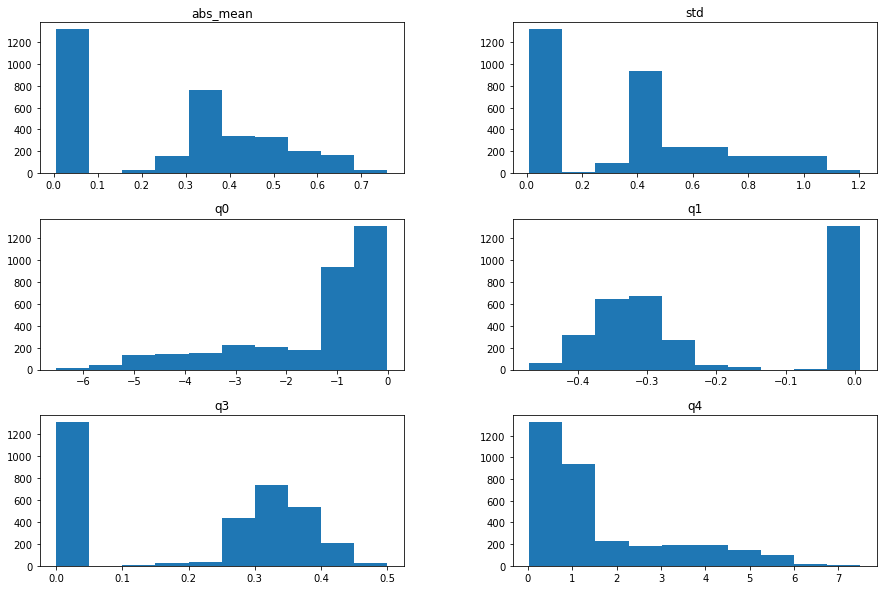

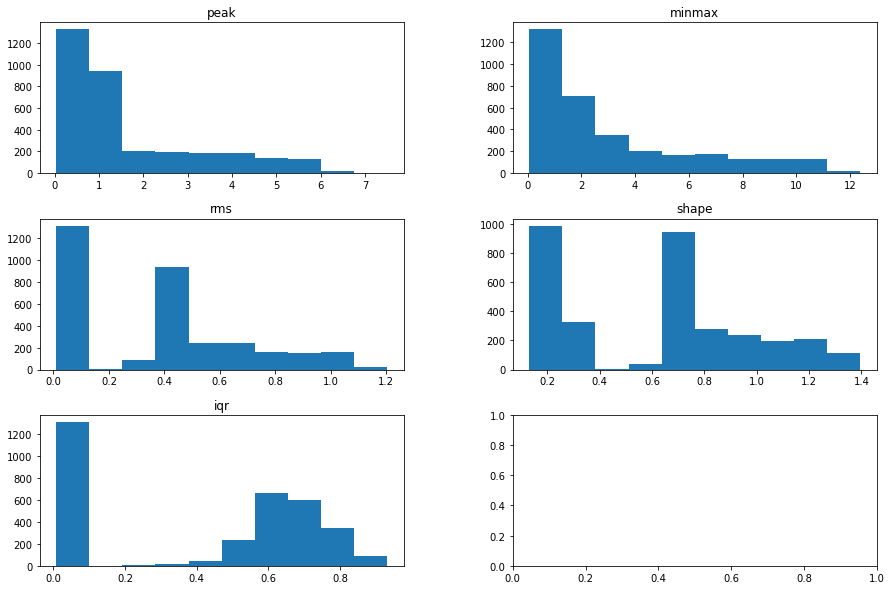

In [13]:
#지표 시각화
f, axes = plt.subplots(3,2, squeeze=False)
f.set_size_inches(15,10)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
axes[0][0].hist(abs_mean)
axes[0][0].set_title('abs_mean')
axes[0][1].hist(std)
axes[0][1].set_title('std')
axes[1][0].hist(q0)
axes[1][0].set_title('q0')
axes[1][1].hist(q1)
axes[1][1].set_title('q1')
axes[2][0].hist(q3)
axes[2][0].set_title('q3')
axes[2][1].hist(q4)
axes[2][1].set_title('q4')
plt.show()

f, axes = plt.subplots(3,2, squeeze=False)
f.set_size_inches(15,10)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
axes[0][0].hist(peak)
axes[0][0].set_title('peak')
axes[0][1].hist(minmax)
axes[0][1].set_title('minmax')
axes[1][0].hist(RMS)
axes[1][0].set_title('rms')
axes[1][1].hist(Shape)
axes[1][1].set_title('shape')
axes[2][0].hist(iqr)
axes[2][0].set_title('iqr')
plt.show()

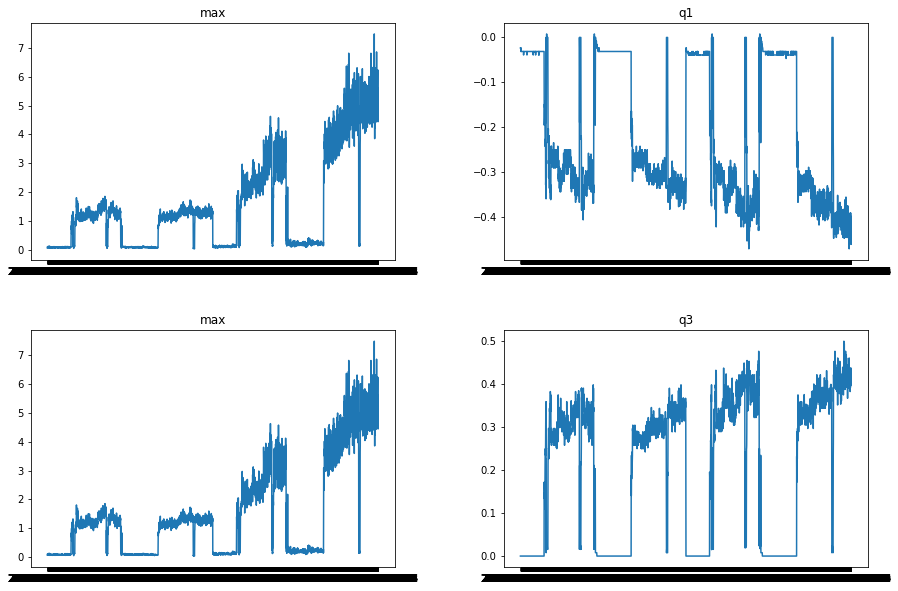

In [17]:
#지표 시각화
f, axes = plt.subplots(2,2, squeeze=False)
f.set_size_inches(15,10)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
axes[0][0].plot(q4)
axes[0][0].set_title('max')
axes[0][1].plot(q1)
axes[0][1].set_title('q1')
axes[1][0].plot(q4)
axes[1][0].set_title('max')
axes[1][1].plot(q3)
axes[1][1].set_title('q3')
plt.show()

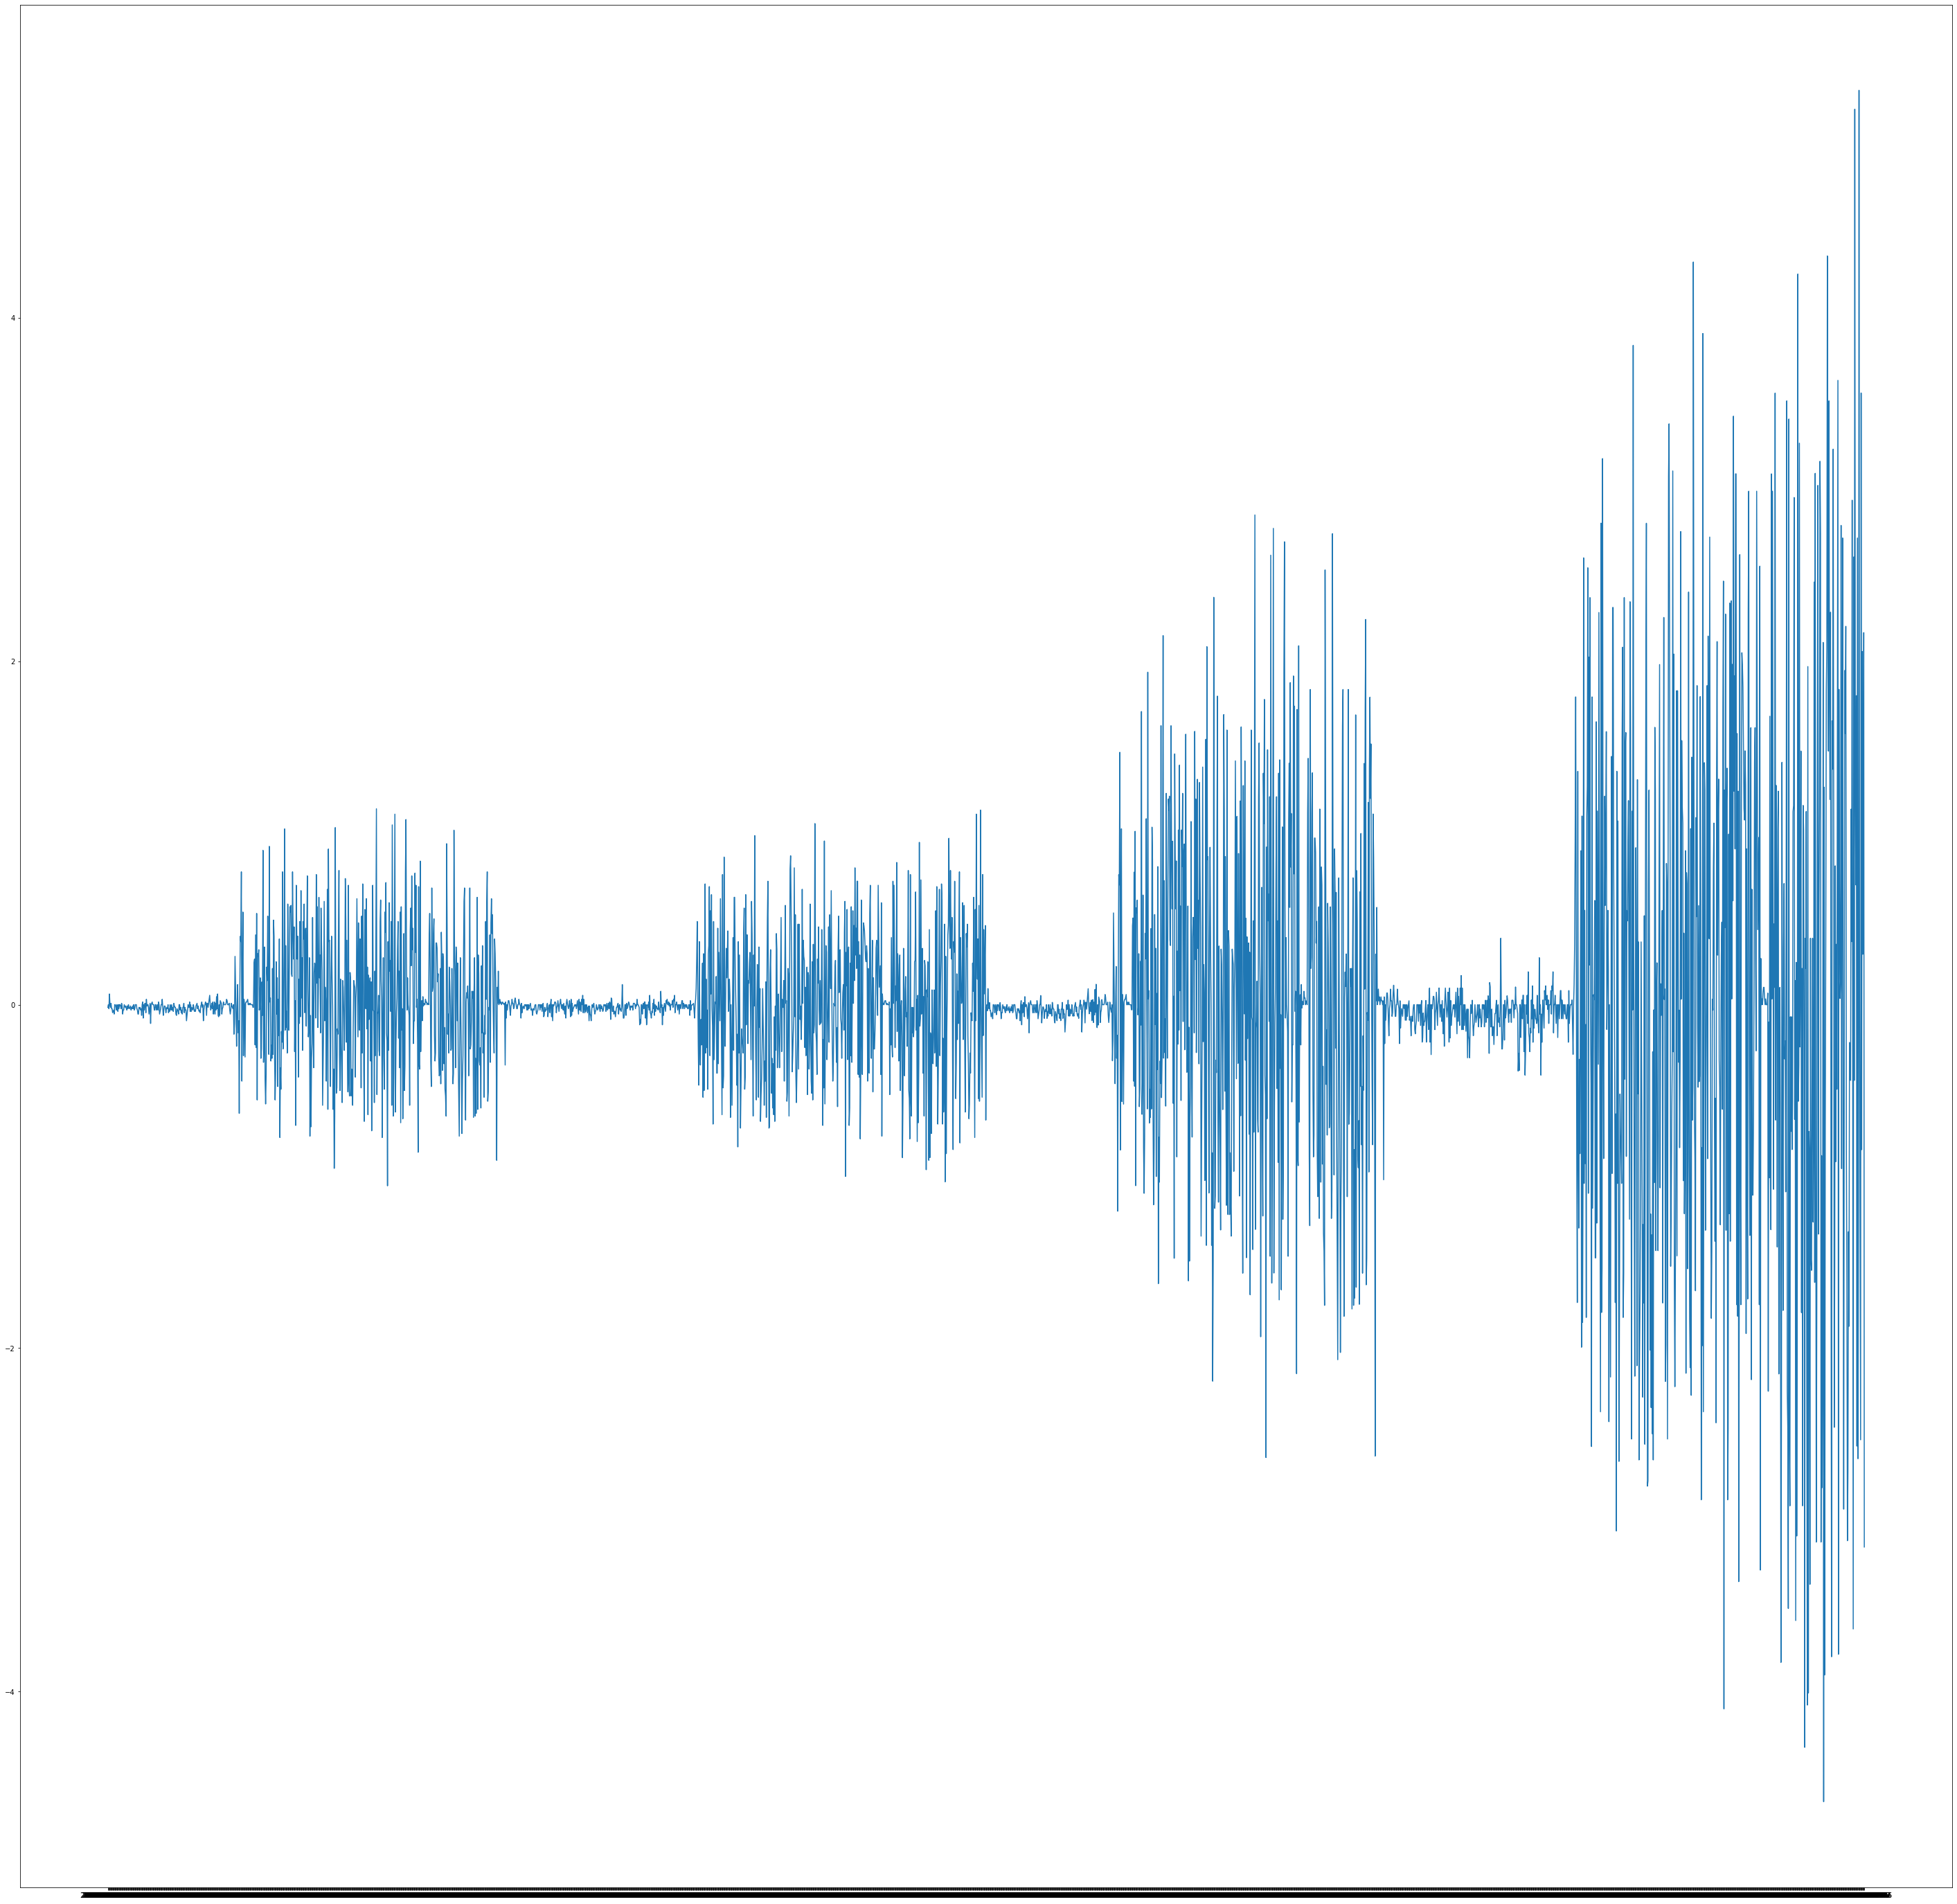

In [14]:
plt.figure(figsize = (50,50))
plt.plot(dat_arr.iloc[:,100])
plt.show()